<a href="https://www.kaggle.com/code/neesham/android-apps-deep-insights?scriptVersionId=90705880" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Let's See, What android developers are doing these days? 📱

<img src="https://developer.android.com/images/social/android-developers.png">

### First things first, Let's import the Weapons!

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec
import os

data = pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Basic Info About the data.

In [2]:
# Name of columns for refrence
print("Column names are: ", data.columns)
print() # for newline '\n'

# Shape of data
print("Shape of data is: ", data.shape)
print() # for newline '\n'

# pandas DataFrame.info()
print(data.info())

# pandas DataFrame.describe()
print(data.describe())

Column names are:  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Shape of data is:  (10841, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android V

### Quality of Data (I messed up with the wrong dataset, not gonna lie. 🥵)

In [3]:
print(data.isnull().sum())
print("The Dataset doesn't contain that much missing value though.")
print()
print(data.dtypes)
print("This dataset has 13 columns out of which 12 has object data type")

print()
# Checking the diversity of the data.
grp = data.groupby('Category')
total_categories = len(grp.groups)
print(f"The data is collected across {total_categories} categories.")

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
The Dataset doesn't contain that much missing value though.

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
This dataset has 13 columns out of which 12 has object data type

The data is collected across 34 categories.


['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]

Only 3 adult apps due to google's strict policies


<AxesSubplot:xlabel='Content Rating', ylabel='Installs'>

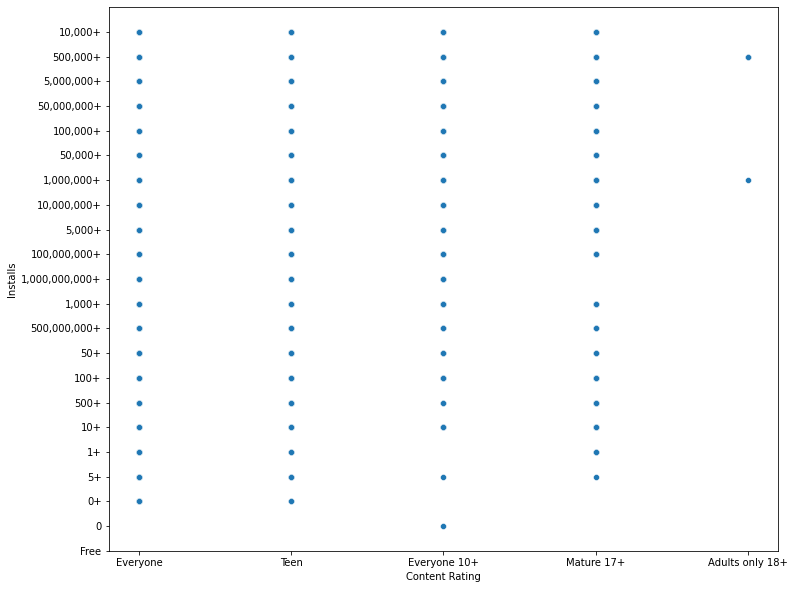

In [4]:
print(data['Content Rating'].unique())

# Removing Unrated apps
content_rating_data = data.loc[data['Content Rating'] != 'Unrated']

print()
# Checking How many adult apps are there.
apps_for_adults = data.loc[data['Content Rating'] == 'Adults only 18+']
print(f"Only {len(apps_for_adults)} adult apps due to google's strict policies")

# Relation ship between installs and label of the app.
plt.figure(figsize = (12, 10))
sns.scatterplot(x = content_rating_data['Content Rating'], y = data.Installs)

# Percentage of Paid Apps 💲

In [5]:
paid_apps = data.loc[data.Type != 'Free']

percentage = (len(paid_apps) / len(data)) * 100

print(f"Only {percentage:.2f}% are paid apps.")

Only 7.40% are paid apps.


## Visualization

People tends to more generous in rating the apps. 


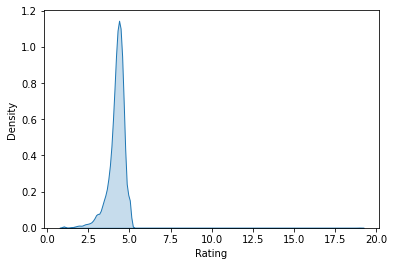

In [6]:

sns.kdeplot(data = data.Rating, shade = True)
#sns.catplot(x="Category", y="Installs", data=data)

print("People tends to more generous in rating the apps. ")

Apps which have less installs tends to have very diversy rating ranging from 1 - 5.
On the other hand, big apps have ratings in the range 3 - 4.


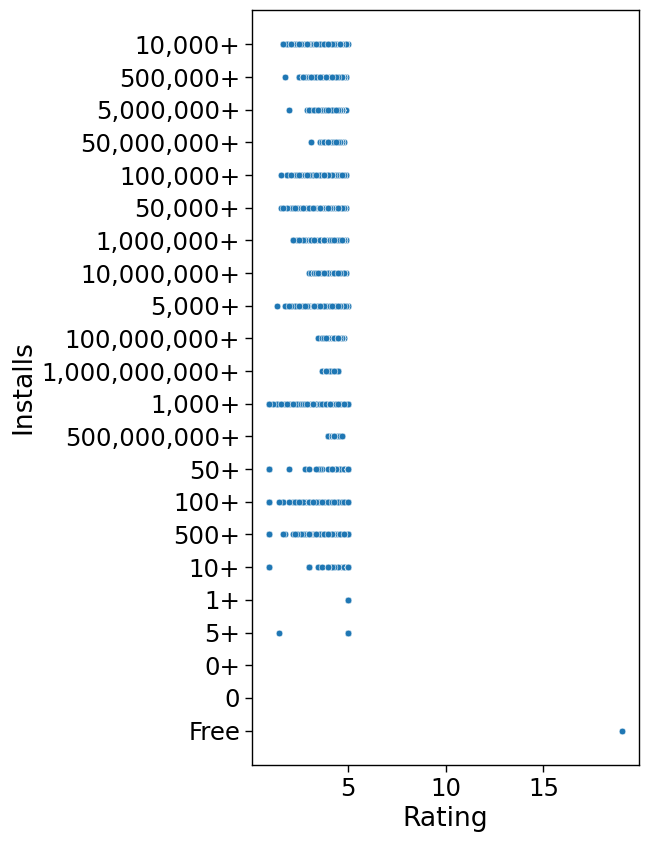

In [7]:
plt.rcParams['figure.dpi'] = 100
sns.set_context('paper', font_scale = 2)
plt.figure(figsize = (5, 10))
sns.scatterplot(x = data.Rating, y = data.Installs)
print("Apps which have less installs tends to have very diversy rating ranging from 1 - 5.")
print("On the other hand, big apps have ratings in the range 3 - 4.")

### Thank You for reading this notebook. Make sure to upvote it 😉.

(The biggest challenge I faced while analyzing this data is that most of the data is categorical. For example number of installs, size of the app, etc.) 😔